In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [103]:
df = pd.read_csv('dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [105]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [106]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [107]:
df['No-show'].value_counts()

No-show
0    88208
1    22319
Name: count, dtype: int64

In [108]:
df['Delay'] = (pd.to_datetime(df['AppointmentDay'])-pd.to_datetime(df['ScheduledDay'])).dt.days + 1
df['Delay']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Delay, Length: 110527, dtype: int64

In [109]:
print(df['Gender'].value_counts())
print(df['Age'].value_counts())
print(df['Neighbourhood'].value_counts())
print(df['Scholarship'].value_counts())
print(df['Hipertension'].value_counts())
print(df['Diabetes'].value_counts())
print(df['Alcoholism'].value_counts())
print(df['Handcap'].value_counts())
print(df['SMS_received'].value_counts())
print(df['No-show'].value_counts())
print(df['Delay'].value_counts())

Gender
0    71840
1    38687
Name: count, dtype: int64
Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64
Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64
Scholarship
0    99666
1    10861
Name: count, dtype: int64
Hipertension
0    88726
1    21801
Name: count, dtype: int64
Diabetes
0    102584
1      7943
Name: count, dtype: int64
Alcoholism
0    107167
1      3360
Name: count, dtype: int64
Handcap
0    108286
1      2042
2       183
3        13
4         3
Na

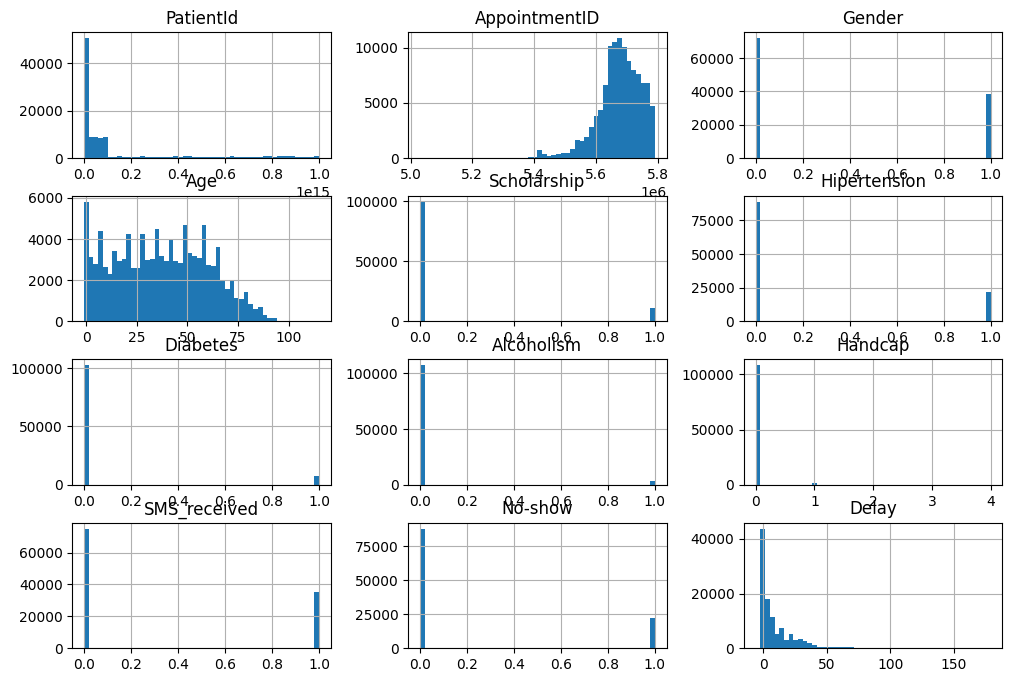

In [110]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(12,8))
plt.show()

In [111]:
df['Age'] = df['Age'].apply(lambda x: df['Age'].median() if x < 0 else x)
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x > 0 else 0)
df['Nodelay']=(df['Delay']==0).astype(int)
df['Smalldelay']=((df['Delay']>0)&(df['Delay']<=7)).astype(int)
df['Bigdelay']=(df['Delay']>7).astype(int)

In [112]:
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','Delay'], axis=1)

In [113]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Nodelay,Smalldelay,Bigdelay
0,0,62.0,0,1,0,0,0,0,0,1,0,0
1,1,56.0,0,0,0,0,0,0,0,1,0,0
2,0,62.0,0,0,0,0,0,0,0,1,0,0
3,0,8.0,0,0,0,0,0,0,0,1,0,0
4,0,56.0,0,1,1,0,0,0,0,1,0,0


In [114]:
df_majority = df[df['No-show'] == 0]
df_minority = df[df['No-show'] == 1]

In [120]:
df_minority_resampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
df_balanced = pd.concat([df_majority, df_minority_resampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [121]:
X = df_balanced.drop(['No-show'], axis=1)
y = df_balanced['No-show']
feature_columns = df.drop(['No-show'], axis=1).columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [123]:
train_df = pd.DataFrame(X_train, columns=feature_columns)
train_df['No-show'] = y_train.values

test_df = pd.DataFrame(X_test, columns=feature_columns)
test_df['No-show'] = y_test.values

In [124]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)